## Neural Network Method

### Predict Daimond price with NN method
     * Dataset visualization
     * Data preprocessing
     * One-hot encoding
     * Training, Testing dataset spliting
     * Predict with Neural Network
     * Fine tuning NN parameter to make it deeper
     * Estimate predicted result
     

In [26]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
data=pd.read_csv("Diamond Dataset.csv")
data.head()



,Shape,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Price
0,Asscher,1.41,F,VVS1,Excellent,68.1,66.0,Very Good,GIA,9668
1,Asscher,1.18,I,VS1,Excellent,68.4,63.0,Excellent,GIA,4408
2,Asscher,1.83,I,VVS2,Excellent,66.6,61.0,Excellent,GIA,8220
3,Asscher,2.32,F,VVS2,Excellent,67.8,63.0,Excellent,GIA,22106
4,Asscher,1.01,I,VVS1,Excellent,70.5,67.0,Very Good,GIA,2901


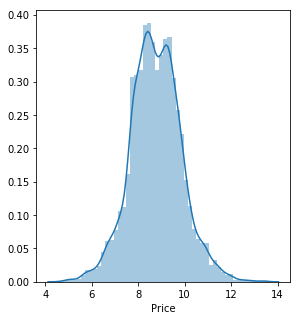

In [27]:
data['Price'] = np.log(data.Price)

plt.figure(figsize=(10,5))
#plt.subplot(1,2,1);
#sns.distplot(data.Price);
plt.subplot(1,2,2);
sns.distplot(data.Price);

#plt.savefig('long_price.png')

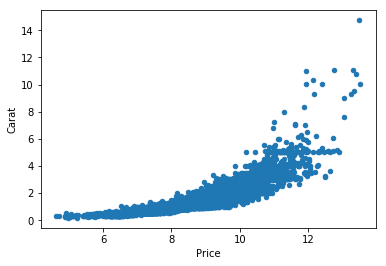

In [28]:
data.plot(kind = "scatter",x="Price",y = "Carat")
plt.savefig('carte.png')

In [29]:
# Handle the outlier by box plot method
def find_outlier(dm):
    Q1 = data[dm].quantile(0.25)
    Q3 = data[dm].quantile(0.85)
    IQR = 1.5*(Q3-Q1)
    upper_limit = Q3+IQR
    lower_limit = Q1-IQR
    outlier = data[(data[dm] < upper_limit) & (data[dm] > lower_limit)]

    return outlier


(10311, 10)

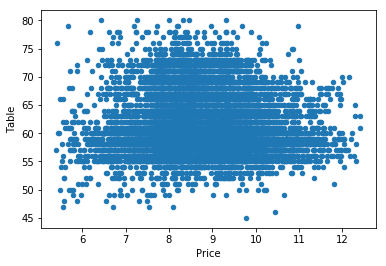

In [30]:
data = find_outlier('Price')
data = find_outlier('Depth')
data = find_outlier('Table')
data.plot(kind = "scatter",x="Price",y = "Table")
plt.savefig('cart.png')
data.shape

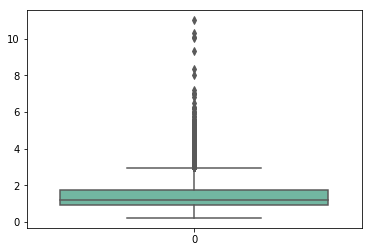

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(data = data['Carat'], palette="Set2")
plt.show()

In [32]:
#data['Carat'] = preprocessing.scale(data['Carat'])
#data['Price'] = preprocessing.scale(data['Price'])
data = data[np.isfinite(data['Depth'])]
data = data[np.isfinite(data['Table'])]
#data['Depth'] = preprocessing.scale(data['Depth'])
#data['Table'] = preprocessing.scale(data['Table'])

In [33]:
data.head()

,Shape,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Price
0,Asscher,1.41,F,VVS1,Excellent,68.1,66.0,Very Good,GIA,9.176577
1,Asscher,1.18,I,VS1,Excellent,68.4,63.0,Excellent,GIA,8.391176
2,Asscher,1.83,I,VVS2,Excellent,66.6,61.0,Excellent,GIA,9.014325
3,Asscher,2.32,F,VVS2,Excellent,67.8,63.0,Excellent,GIA,10.003604
4,Asscher,1.01,I,VVS1,Excellent,70.5,67.0,Very Good,GIA,7.972811


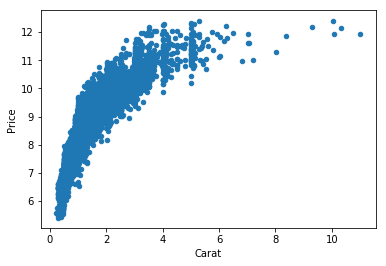

In [34]:
data.plot(kind = "scatter",x="Carat",y = "Price")
plt.savefig('carta.png')

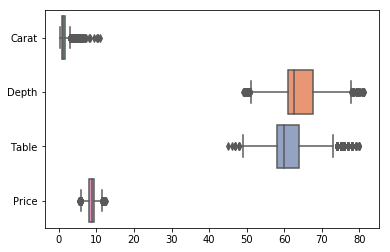

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(data = data, orient= 'h', palette="Set2")
plt.show()

In [36]:
data.loc[data.Color == 'P','Color'] = 0
data.loc[data.Color == 'M','Color'] = 1
data.loc[data.Color == 'L','Color'] = 2
data.loc[data.Color == 'K','Color'] = 3
data.loc[data.Color == 'J','Color'] = 4
data.loc[data.Color == 'I','Color'] = 5
data.loc[data.Color == 'H','Color'] = 6
data.loc[data.Color == 'G','Color'] = 7
data.loc[data.Color == 'F','Color'] = 8
data.loc[data.Color == 'E','Color'] = 9
data.loc[data.Color == 'D','Color'] = 10
data.loc[data.Clarity == 'I3','Clarity'] = 0
data.loc[data.Clarity == 'I2','Clarity'] = 1
data.loc[data.Clarity == 'I1','Clarity'] = 2
data.loc[data.Clarity == 'SI2','Clarity'] = 3
data.loc[data.Clarity == 'SI1','Clarity'] = 4
data.loc[data.Clarity == 'VS2','Clarity'] = 5
data.loc[data.Clarity == 'VS1','Clarity'] = 6
data.loc[data.Clarity == 'VVS2','Clarity'] = 7
data.loc[data.Clarity == 'VVS1','Clarity'] = 8
data.loc[data.Clarity == 'IF','Clarity'] = 9
data.loc[data.Clarity == 'FL','Clarity'] = 10
data.loc[data.Cut == 'Fair','Cut'] = 0
data.loc[data.Cut == 'Good','Cut'] = 1
data.loc[data.Cut == 'Very Good','Cut'] = 2
data.loc[data.Cut == 'Excellent','Cut'] = 3
data.loc[data.Symmetry == 'Fair','Symmetry'] = 0
data.loc[data.Symmetry == 'Good','Symmetry'] = 1
data.loc[data.Symmetry == 'Very Good','Symmetry'] = 2
data.loc[data.Symmetry == 'Excellent','Symmetry'] = 3
data['Cert'] = ['GIA' if x == 'GIA' else 'Other' for x in data['Cert']]


data.loc[data.Cert == 'Other','Cert'] = 0
data.loc[data.Cert == 'GIA','Cert'] = 1

In [37]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df
todummy_list = ['Shape']
data = dummy_df(data, todummy_list)
print(data.head())

   Carat  Color  Clarity Cut  Depth  Table  Symmetry  Cert      Price  \
0   1.41      8        8   3   68.1   66.0         2     1   9.176577   
1   1.18      5        6   3   68.4   63.0         3     1   8.391176   
2   1.83      5        7   3   66.6   61.0         3     1   9.014325   
3   2.32      8        7   3   67.8   63.0         3     1  10.003604   
4   1.01      5        8   3   70.5   67.0         2     1   7.972811   

   Shape_Asscher  Shape_Cushion  Shape_Cushion Brilliant  Shape_Emerald  \
0              1              0                        0              0   
1              1              0                        0              0   
2              1              0                        0              0   
3              1              0                        0              0   
4              1              0                        0              0   

   Shape_Heart  Shape_Marquise  Shape_Oval  Shape_Pear  Shape_Princess  \
0            0               0      

In [38]:
data = data.dropna()

cols = list(data.columns.values)
cols.pop(cols.index('Price'))
data = data[cols + ['Price']]

data.head()

,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Shape_Asscher,Shape_Cushion,Shape_Cushion Brilliant,Shape_Emerald,Shape_Heart,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Price
0,1.41,8,8,3,68.1,66.0,2,1,1,0,0,0,0,0,0,0,0,0,0,9.176577
1,1.18,5,6,3,68.4,63.0,3,1,1,0,0,0,0,0,0,0,0,0,0,8.391176
2,1.83,5,7,3,66.6,61.0,3,1,1,0,0,0,0,0,0,0,0,0,0,9.014325
3,2.32,8,7,3,67.8,63.0,3,1,1,0,0,0,0,0,0,0,0,0,0,10.003604
4,1.01,5,8,3,70.5,67.0,2,1,1,0,0,0,0,0,0,0,0,0,0,7.972811


In [39]:
# Handle the outlier by box plot method
def find_outlier(dm):
    Q1 = data[dm].quantile(0.25)
    Q3 = data[dm].quantile(0.75)
    IQR = 1.5*(Q3-Q1)
    upper_limit = Q3+IQR
    lower_limit = Q1-IQR
    outlier = data[(data[dm] < upper_limit) & (data[dm] > lower_limit)]

    return outlier

In [40]:
data = find_outlier('Carat')
X = data.drop(['Price'],1)
Y = data['Price']


In [47]:
from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.35, random_state=0) 
X_train.head()

,Carat,Color,Clarity,Cut,Depth,Table,Symmetry,Cert,Shape_Asscher,Shape_Cushion,Shape_Cushion Brilliant,Shape_Emerald,Shape_Heart,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round
9596,1.12,6,5,3,60.4,58.0,3,1,0,0,0,0,0,0,0,0,0,0,1
2019,2.10,4,6,3,61.2,63.0,3,1,0,0,0,1,0,0,0,0,0,0,0
4591,2.04,4,6,2,64.0,55.0,1,1,0,0,0,0,0,0,0,1,0,0,0
8365,1.33,6,6,3,62.4,57.0,3,1,0,0,0,0,0,0,0,0,0,0,1
2313,0.90,8,4,3,68.8,66.0,2,1,0,0,0,1,0,0,0,0,0,0,0


In [42]:
data['Color'] = data['Color'].convert_objects(convert_numeric=True)
data['Clarity'] = data['Clarity'].convert_objects(convert_numeric=True)
data['Cert'] = data['Cert'].convert_objects(convert_numeric=True)
data['Cut'] = data['Cut'].convert_objects(convert_numeric=True)
data['Symmetry'] = data['Symmetry'].convert_objects(convert_numeric=True)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports unti

In [43]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy= True, with_mean = True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(19,19,19,19,19,),random_state=1)
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(19, 19, 19, 19, 19), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [45]:
predictions = mlp.predict(X_test)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, random_state=None, shuffle=False)
cv_results = cross_val_score(mlp, X_train, y_train, cv=kfold, n_jobs=-1) 
print("Predict Result mean", cv_results.mean())
print("Predict Result standard deviation", cv_results.std())
print("Predict Result r2 score",r2_score(y_test, predictions))

Predict Result mean 0.957756021626
Predict Result standard deviation 0.00485735560765
Predict Result r2 score 0.970405737525
